In [1]:
import pickle 
with open('protocal_result_136bit.pkl', 'rb') as f:
    all_res = pickle.load(f)

from qiskit.visualization import plot_histogram

# for bitstring, state_count in  all_res.items():
#     fig = plot_histogram(state_count, title = bitstring, figsize=(18,12))
#     fig.show()
#     break

In [ ]:
all_res


In [2]:
protocol_results = {}
for bitstring ,state_count in  all_res.items():
     new_bitstring = bitstring[0:8]+bitstring[13:15]+bitstring[17]
     new_status_count = {}
     for measure_bitstring, count in state_count.items():
          new_measure_bitstring = measure_bitstring[0:8]+measure_bitstring[13:15]+measure_bitstring[17]
          if new_measure_bitstring not in new_status_count:
               new_status_count[new_measure_bitstring] = count
          else:
               new_status_count[new_measure_bitstring] += count
     protocol_results[new_bitstring] = new_status_count


In [4]:
with open('protocal_result_11bit.pkl', 'wb') as f:
    pickle.dump(new_res, f)

In [3]:
new_res

{'11001200221': {'10000200220': 0.374,
  '10000201220': 0.013,
  '10001200220': 0.48400000000000004,
  '10001200221': 0.006,
  '10001201220': 0.015,
  '10100200220': 0.055,
  '10101200220': 0.052,
  '10101201220': 0.001},
 '10112001112': {'00002000112': 0.001,
  '00002001012': 0.001,
  '00002001112': 0.004,
  '00012000112': 0.001,
  '00012001012': 0.003,
  '00012001112': 0.004,
  '00102000012': 0.001,
  '00102000112': 0.001,
  '00102001012': 0.004,
  '00102001102': 0.002,
  '00102001112': 0.008,
  '00112000012': 0.003,
  '00112000112': 0.006,
  '00112001012': 0.019000000000000003,
  '00112001102': 0.002,
  '00112001112': 0.03400000000000001,
  '00112011112': 0.002,
  '00112011012': 0.002,
  '00112101112': 0.001,
  '01012001112': 0.001,
  '10002000012': 0.001,
  '10002001012': 0.004,
  '10002001102': 0.002,
  '10002001112': 0.013000000000000001,
  '10012000012': 0.001,
  '10012000112': 0.011000000000000001,
  '10012000002': 0.001,
  '10012000102': 0.001,
  '10012001002': 0.001,
  '10012

In [3]:
import numpy as np
np.set_printoptions(suppress=True)

In [5]:
measure_success = np.zeros(shape=(136, 3))
n_measures = np.zeros(shape=(136, 3))
 
for real_bitstring, status_count in all_res.items():
    
    real_bitstring = [int(bit) for bit in real_bitstring]
    for measure_bitstring, count in status_count.items():
        for qubit, value in enumerate(measure_bitstring):
            real_value = real_bitstring[qubit]
            value = int(value)
            if value == real_value:
                measure_success[qubit][real_value] += count
            n_measures[qubit][real_value] += count

measure_fids = measure_success/n_measures

In [6]:
measure_fids

array([[0.98255684, 0.97253161, 1.        ],
       [0.98656313, 0.97773172, 1.        ],
       [0.8454101 , 0.90733638, 1.        ],
       [0.97396632, 0.95069201, 1.        ],
       [0.86178381, 0.93103112, 1.        ],
       [0.96554022, 0.95119454, 1.        ],
       [0.97338346, 0.9398565 , 1.        ],
       [0.948144  , 0.91558062, 1.        ],
       [0.96270684, 0.93243741, 1.        ],
       [0.90976381, 0.86179695, 1.        ],
       [0.92429863, 0.90031029, 1.        ],
       [0.95721008, 0.94936107, 1.        ],
       [0.91137102, 0.94083052, 1.        ],
       [0.93903813, 0.95050883, 1.        ],
       [0.88122228, 0.93421741, 1.        ],
       [0.91135781, 0.86617295, 1.        ],
       [0.89929418, 0.91898639, 1.        ],
       [0.92408474, 0.90531337, 1.        ],
       [0.95781298, 0.92319974, 1.        ],
       [0.88900298, 0.87221389, 1.        ],
       [0.81292835, 0.8931808 , 1.        ],
       [0.89417483, 0.90060848, 1.        ],
       [0.

In [9]:
np.where(measure_fids[:,1] < 0.8)
# len([ 0,  1,  2,  3,  4,  5,  6,  7, 13, 14, 17])
#[ 0,  1,  2,  3,  4,  5,  6,  7, 13, 14, 17]

(array([ 63, 101]),)

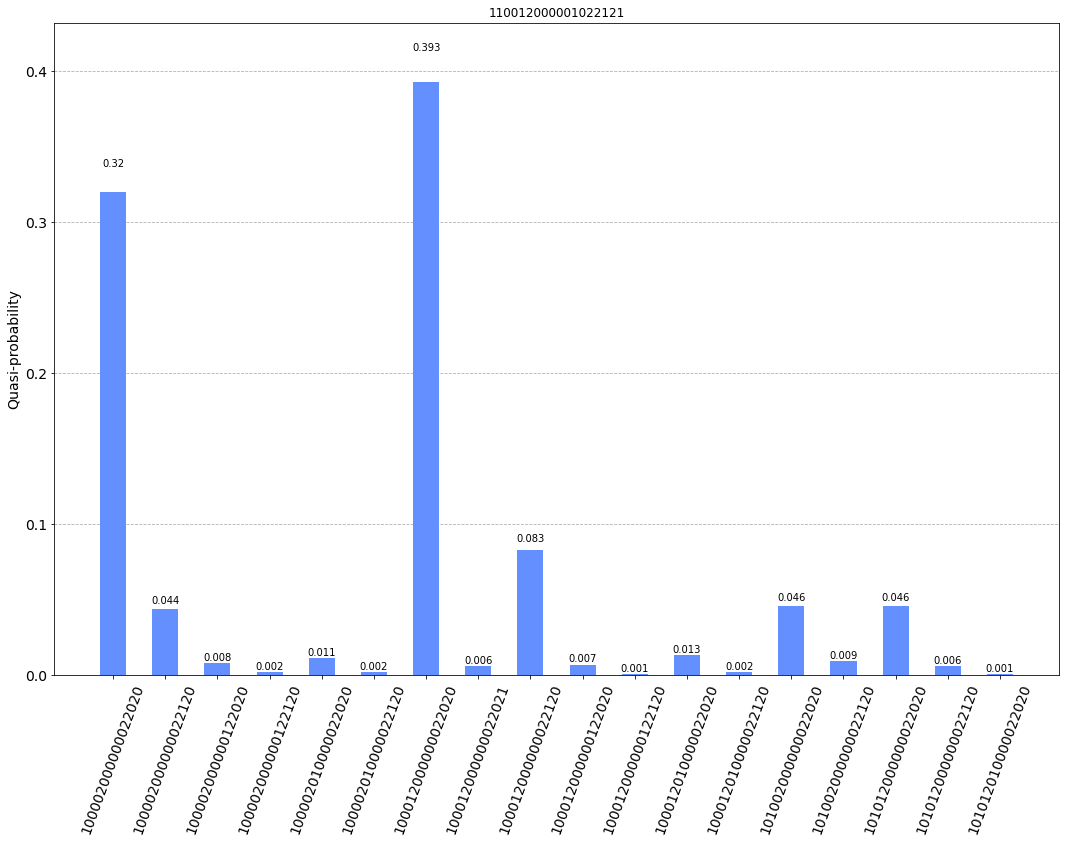

In [10]:
fig

Text(0, 0.5, 'score')

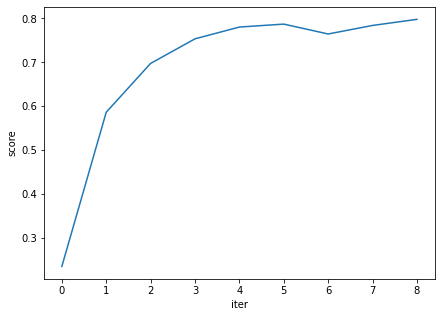

In [6]:
score= [0.23490275459945578, 0.586227406972083, 0.6975117489517809, 0.7535003914676991, 0.7803751874150241, 0.7870774210389958, 0.7645589095640278, 0.7840233805848561, 0.7979040836776826]
import matplotlib.pyplot as plt
fig, ax =  plt.subplots(figsize = (7, 5))
iter = [i for i in range(len(score))]
ax.plot(iter ,score)
ax.set_xlabel('iter')
ax.set_ylabel('score')

